### Daftar Isi
* [1) Mengumpulkan Data](#h1)
* [2) Menelaah Data](#h2)
* [3) Memvalidasi Data](#h3)
* [4) Menentukan Object Data](#h4)
* [5) Membersihkan Data](#h5)
* [6) Mengkonstruksi Data](#h6)
* [7) Menentukan Label Data](#h7)
* [8) Membangun Model](#h8)
* [9) Mengevaluasi Hasil Pemodelan](#h9)
* [10) Optimasi Model Klasifikasi](#h10)


## 1) Mengumpulkan Data <a class="anchor" id="h1"></a>

In [ ]:
# load library yang diperlukan
import pandas as pd

In [ ]:
# load data menjadi data frame
dataset = pd.read_csv('breast-cancer-wisconsin.data', header=None)

In [ ]:
# menampilkan data
dataset

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
# memasukkan nama fitur kedalam dataset
dataset.columns=['Sample_code_number', 'Clump_thickness', 'Uniformity_of_cell_size', 'Uniformity_of_cell_shape',
                 'Marginal_adhesion', 'Single_epithelial_cell_size', 'Bare_nuclei',
                 'Bland_chromatin', 'Normal_nucleoli', 'Mitoses', 'Class']

In [ ]:
# lakukan pengecekan apakah dataset sudah benar dengan menampilkan 5 data teratas
dataset.head(5)

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## 2) Menelaah Data <a class="anchor" id="h2"></a>

In [ ]:
# menampilkan informasi dari file dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample_code_number           699 non-null    int64 
 1   Clump_thickness              699 non-null    int64 
 2   Uniformity_of_cell_size      699 non-null    int64 
 3   Uniformity_of_cell_shape     699 non-null    int64 
 4   Marginal_adhesion            699 non-null    int64 
 5   Single_epithelial_cell_size  699 non-null    int64 
 6   Bare_nuclei                  699 non-null    object
 7   Bland_chromatin              699 non-null    int64 
 8   Normal_nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [ ]:
# menampilkan deskripsi dari file dataset
dataset.describe()

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bland_chromatin,Normal_nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

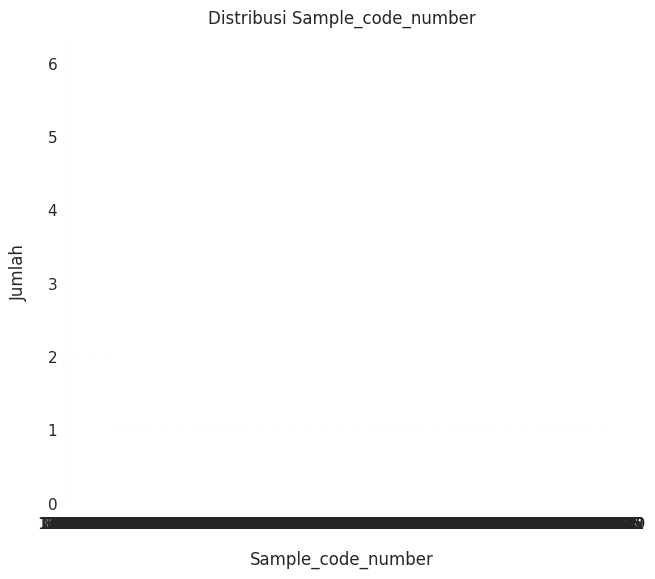

In [ ]:
# dibawah adalah contoh kode program untuk fitur 1
sns.set(font_scale=1.0)
dataset['Sample_code_number'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Sample_code_number", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Sample_code_number", y=1.02);

### Isi Koding 1

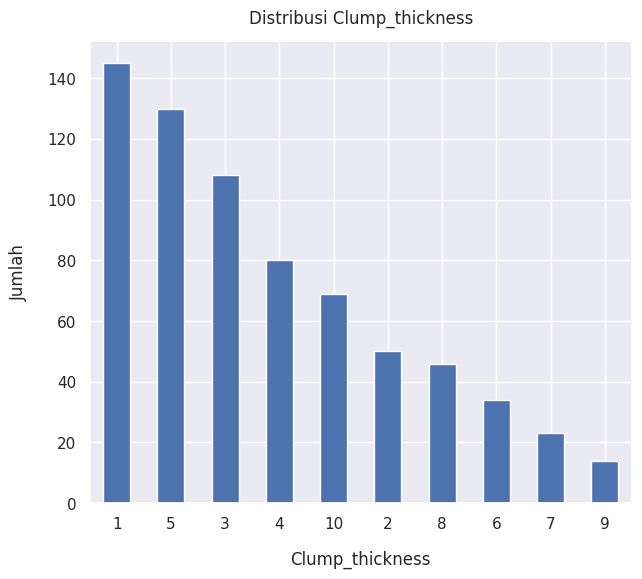

In [ ]:
# tuliskan kode program untuk menampilkan distribusi kelas dari semua fitur
sns.set(font_scale=1.0)
dataset['Clump_thickness'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Clump_thickness", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Clump_thickness", y=1.02);

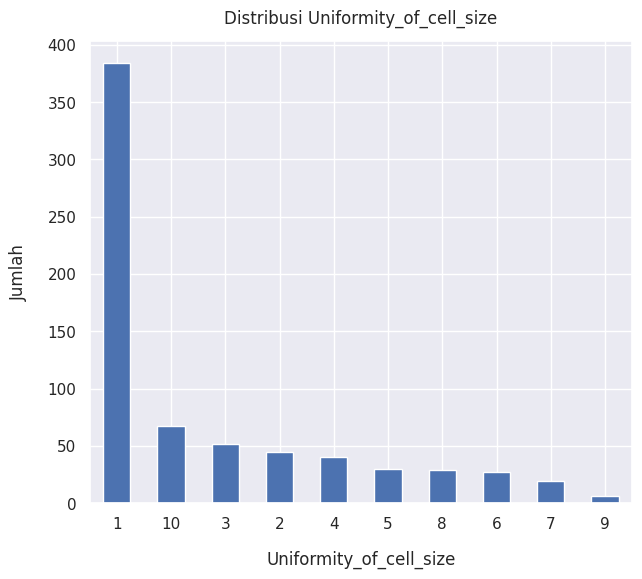

In [ ]:
sns.set(font_scale=1.0)
dataset['Uniformity_of_cell_size'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Uniformity_of_cell_size", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Uniformity_of_cell_size", y=1.02);

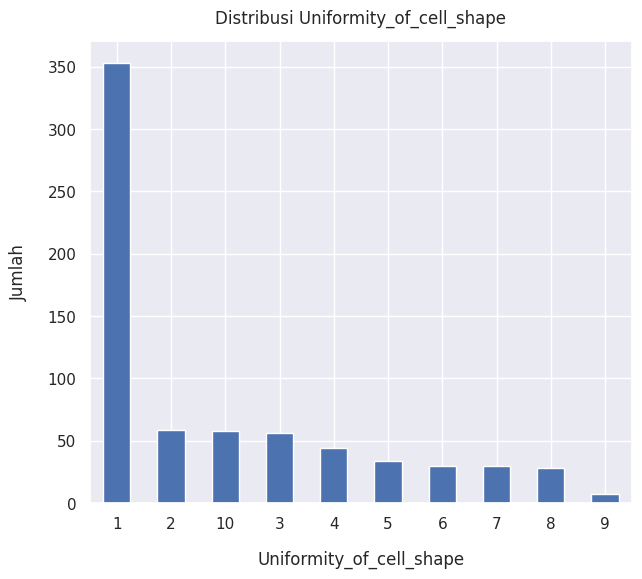

In [ ]:
sns.set(font_scale=1.0)
dataset['Uniformity_of_cell_shape'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Uniformity_of_cell_shape", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Uniformity_of_cell_shape", y=1.02);

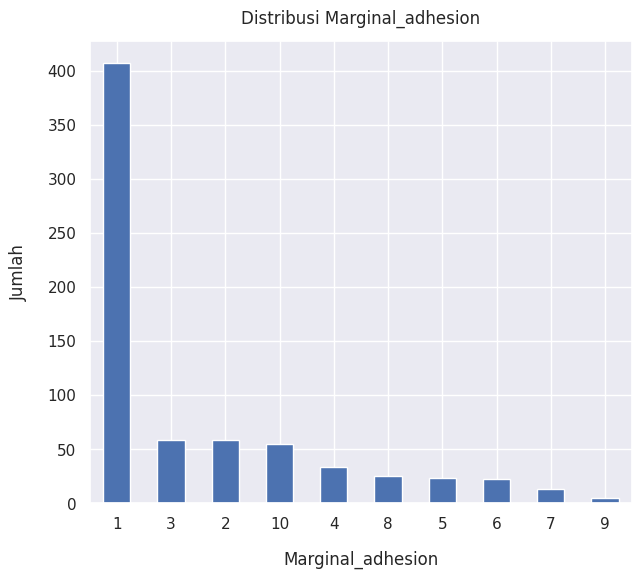

In [ ]:
sns.set(font_scale=1.0)
dataset['Marginal_adhesion'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Marginal_adhesion", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Marginal_adhesion", y=1.02);

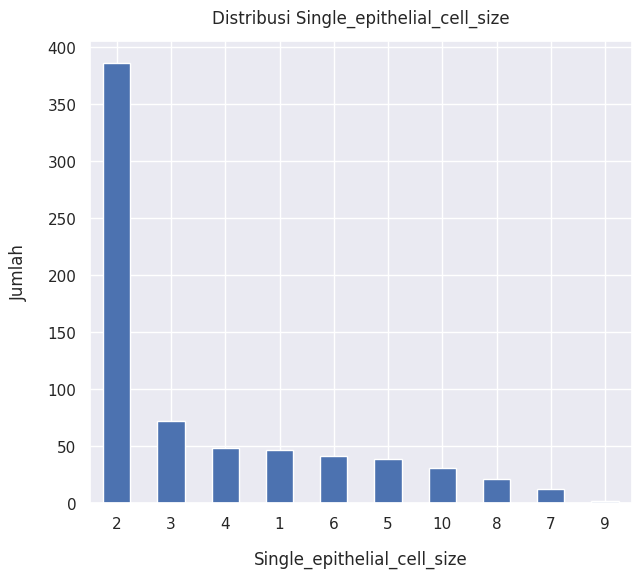

In [ ]:
sns.set(font_scale=1.0)
dataset['Single_epithelial_cell_size'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Single_epithelial_cell_size", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Single_epithelial_cell_size", y=1.02);

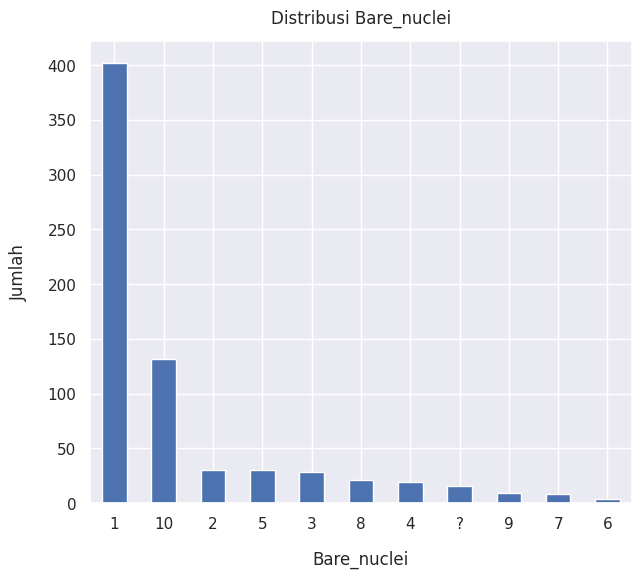

In [ ]:
sns.set(font_scale=1.0)
dataset['Bare_nuclei'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Bare_nuclei", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Bare_nuclei", y=1.02);

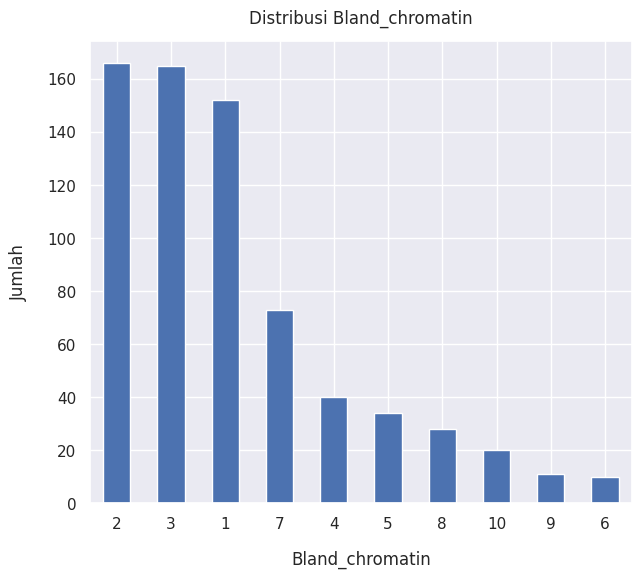

In [ ]:
sns.set(font_scale=1.0)
dataset['Bland_chromatin'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Bland_chromatin", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Bland_chromatin", y=1.02);

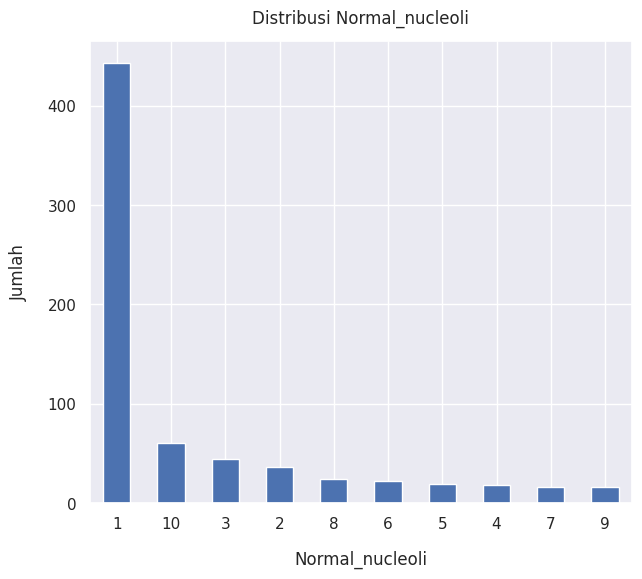

In [ ]:
sns.set(font_scale=1.0)
dataset['Normal_nucleoli'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Normal_nucleoli", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Normal_nucleoli", y=1.02);

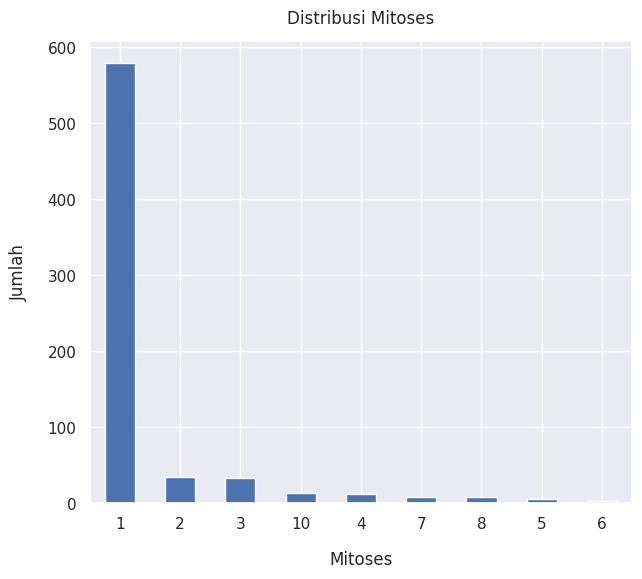

In [ ]:
sns.set(font_scale=1.0)
dataset['Mitoses'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Mitoses", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Mitoses", y=1.02);

## 3) Memvalidasi Data <a class="anchor" id="h3"></a>

Dalam aktivitas ini, Anda harus dapat melakukan pengecekan atas data yang Anda gunakan apakah terdapat missing value, noisy data, atau data yang tidak sesuai lainnya

###Essay 1
Deskripsikan Temuan Anda disini:

Terdapat missing value maka harus dilakukan tahapan memperbaiki nilai yang hilang

## 4) Menentukan Objek Data <a class="anchor" id="h4"></a>

In [ ]:
import numpy as np

In [ ]:
# menggantikan nilai yang salah pada data
dataset.replace("?", np.nan, inplace= True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample_code_number           699 non-null    int64 
 1   Clump_thickness              699 non-null    int64 
 2   Uniformity_of_cell_size      699 non-null    int64 
 3   Uniformity_of_cell_shape     699 non-null    int64 
 4   Marginal_adhesion            699 non-null    int64 
 5   Single_epithelial_cell_size  699 non-null    int64 
 6   Bare_nuclei                  683 non-null    object
 7   Bland_chromatin              699 non-null    int64 
 8   Normal_nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


###Essay 2
Deskripsikan Temuan Anda disini:

*   Pada fitur "Bare_nuclei" tipe datanya object maka tipe data tersebut harus diubah terlebih dahulu
*   Terdapat nilai null pada fitur "Bare_nuclei" maka nilai null tersebut akan dilakukan pengisian dengan nilai median

## 5) Membersihkan Data <a class="anchor" id="h5"></a>

In [ ]:
# menghitung nilai Null pada dataset
dataset.isnull().sum()

Sample_code_number              0
Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [ ]:
# mendeteksi keberadaan nilai Null
dataset.loc[:, dataset.isnull().any()].columns

Index([], dtype='object')

In [ ]:
# mengubah type data dari salah satu fitur
dataset['Bare_nuclei'] = dataset['Bare_nuclei'].astype(str).astype(float)

In [ ]:
# menampilkan informasi dari data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample_code_number           699 non-null    int64  
 1   Clump_thickness              699 non-null    int64  
 2   Uniformity_of_cell_size      699 non-null    int64  
 3   Uniformity_of_cell_shape     699 non-null    int64  
 4   Marginal_adhesion            699 non-null    int64  
 5   Single_epithelial_cell_size  699 non-null    int64  
 6   Bare_nuclei                  683 non-null    float64
 7   Bland_chromatin              699 non-null    int64  
 8   Normal_nucleoli              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [ ]:
import missingno

<Axes: >

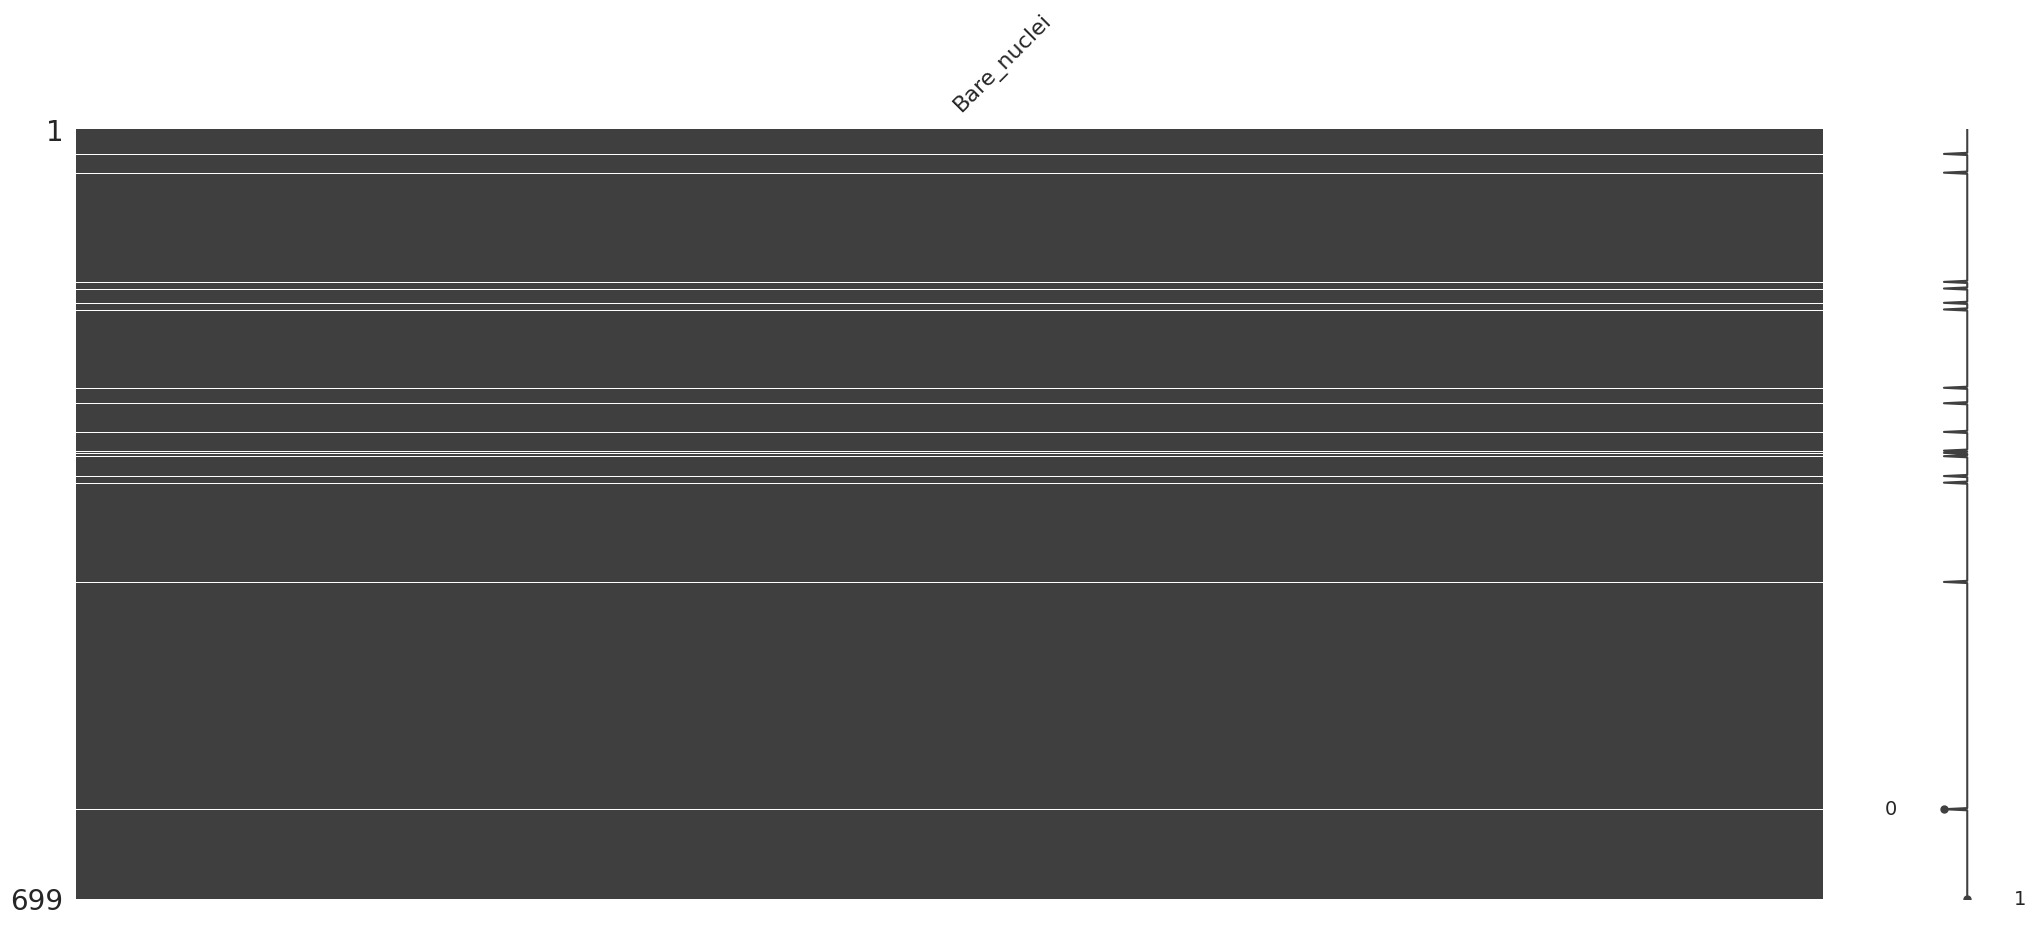

In [ ]:
# memvisualisasikan keberadaan nilai Null
missingdata_df = dataset.columns[dataset.isnull().any()].tolist()
missingno.matrix(dataset[missingdata_df])

In [ ]:
# hapus fitur jika fitur yang hilang lebih dari 50%:
# dataset.drop(['fitur'], axis="columns", inplace=True),

# jika tidak, maka
median_value=dataset['Bare_nuclei'].median()
dataset['Bare_nuclei']=dataset['Bare_nuclei'].fillna(median_value)

### Isi Koding 2

In [ ]:
dataset.isnull().sum()

Sample_code_number             0
Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [ ]:
# menampilkan data duplikat
duplicate_rows = dataset.duplicated()
print("All Duplicate Rows:")
dataset[dataset.duplicated(keep=False)]

All Duplicate Rows:


,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
42,1100524,6,10,10,2,8,10.0,7,3,3,4
62,1116116,9,10,10,1,10,8.0,3,3,1,4
168,1198641,3,1,1,1,2,1.0,3,1,1,2
207,1218860,1,1,1,1,1,1.0,3,1,1,2
208,1218860,1,1,1,1,1,1.0,3,1,1,2
253,1100524,6,10,10,2,8,10.0,7,3,3,4
254,1116116,9,10,10,1,10,8.0,3,3,1,4
258,1198641,3,1,1,1,2,1.0,3,1,1,2
267,320675,3,3,5,2,3,10.0,7,1,1,4
272,320675,3,3,5,2,3,10.0,7,1,1,4


In [ ]:
# Menghapus data duplikat, menyimpan data dalam variabel baru "dataClean"
dataClean = dataset.drop_duplicates()
print("All Duplicate Rows:")
dataClean[dataClean.duplicated(keep=False)]

All Duplicate Rows:


,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample_code_number           699 non-null    int64  
 1   Clump_thickness              699 non-null    int64  
 2   Uniformity_of_cell_size      699 non-null    int64  
 3   Uniformity_of_cell_shape     699 non-null    int64  
 4   Marginal_adhesion            699 non-null    int64  
 5   Single_epithelial_cell_size  699 non-null    int64  
 6   Bare_nuclei                  699 non-null    float64
 7   Bland_chromatin              699 non-null    int64  
 8   Normal_nucleoli              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [ ]:
dataClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample_code_number           690 non-null    int64  
 1   Clump_thickness              690 non-null    int64  
 2   Uniformity_of_cell_size      690 non-null    int64  
 3   Uniformity_of_cell_shape     690 non-null    int64  
 4   Marginal_adhesion            690 non-null    int64  
 5   Single_epithelial_cell_size  690 non-null    int64  
 6   Bare_nuclei                  690 non-null    float64
 7   Bland_chromatin              690 non-null    int64  
 8   Normal_nucleoli              690 non-null    int64  
 9   Mitoses                      690 non-null    int64  
 10  Class                        690 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 64.7 KB


Temuan:

## 6) Menkonstruksi Data <a class="anchor" id="h2"></a>

2    452
4    238
Name: Class, dtype: int64


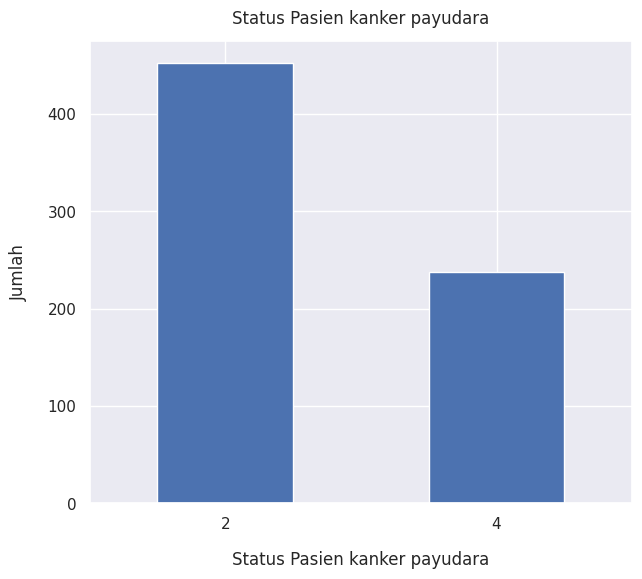

In [ ]:
# menampilkan distribusi kelas dari target
print(dataClean['Class'].value_counts())
sns.set(font_scale=1.0)
dataClean['Class'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Status Pasien kanker payudara", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Status Pasien kanker payudara", y=1.02);

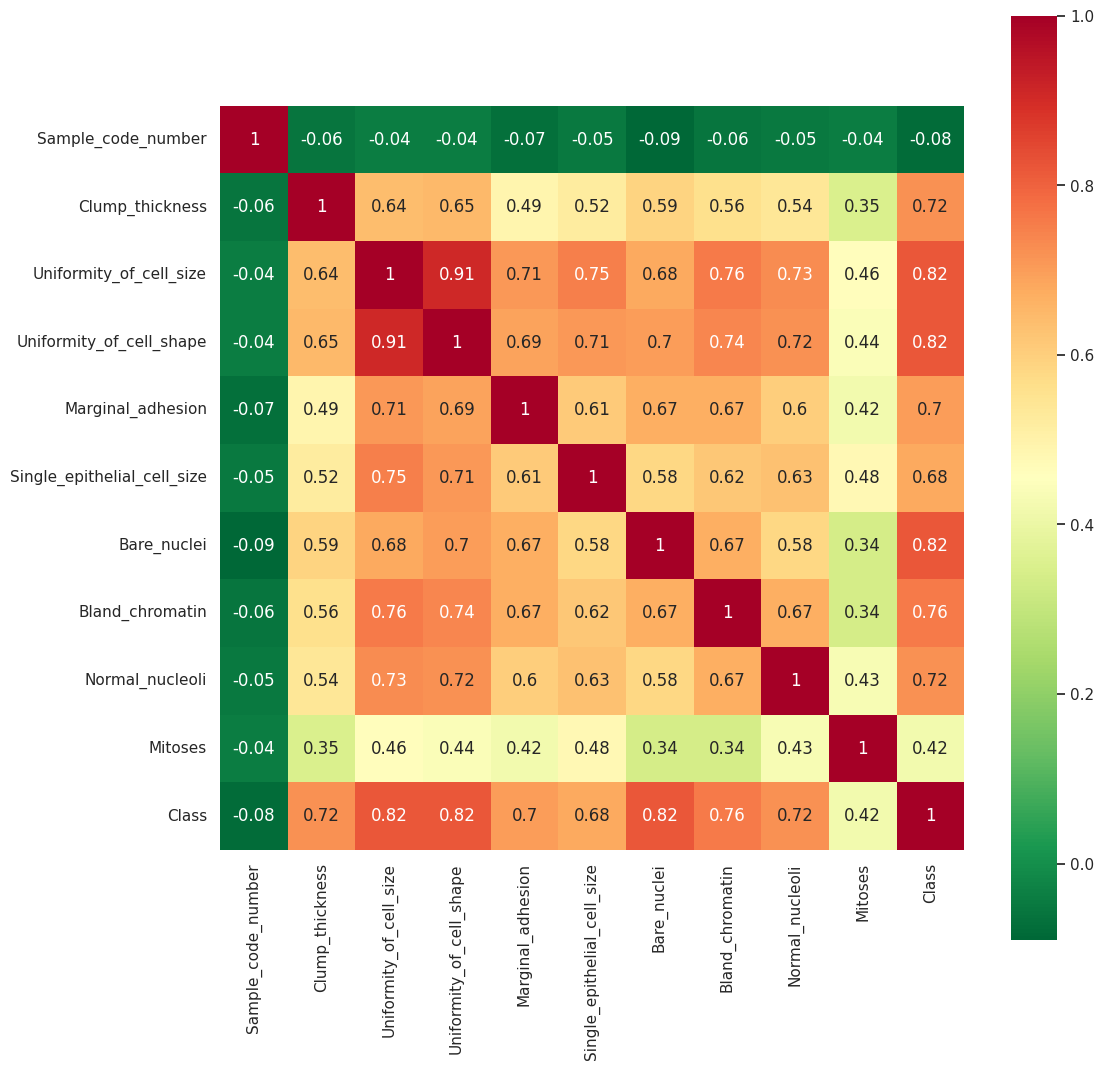

In [ ]:
# menampilkan Korelasi antar Fitur
correlation = dataClean.corr()
plt.subplots(figsize = (12,12))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

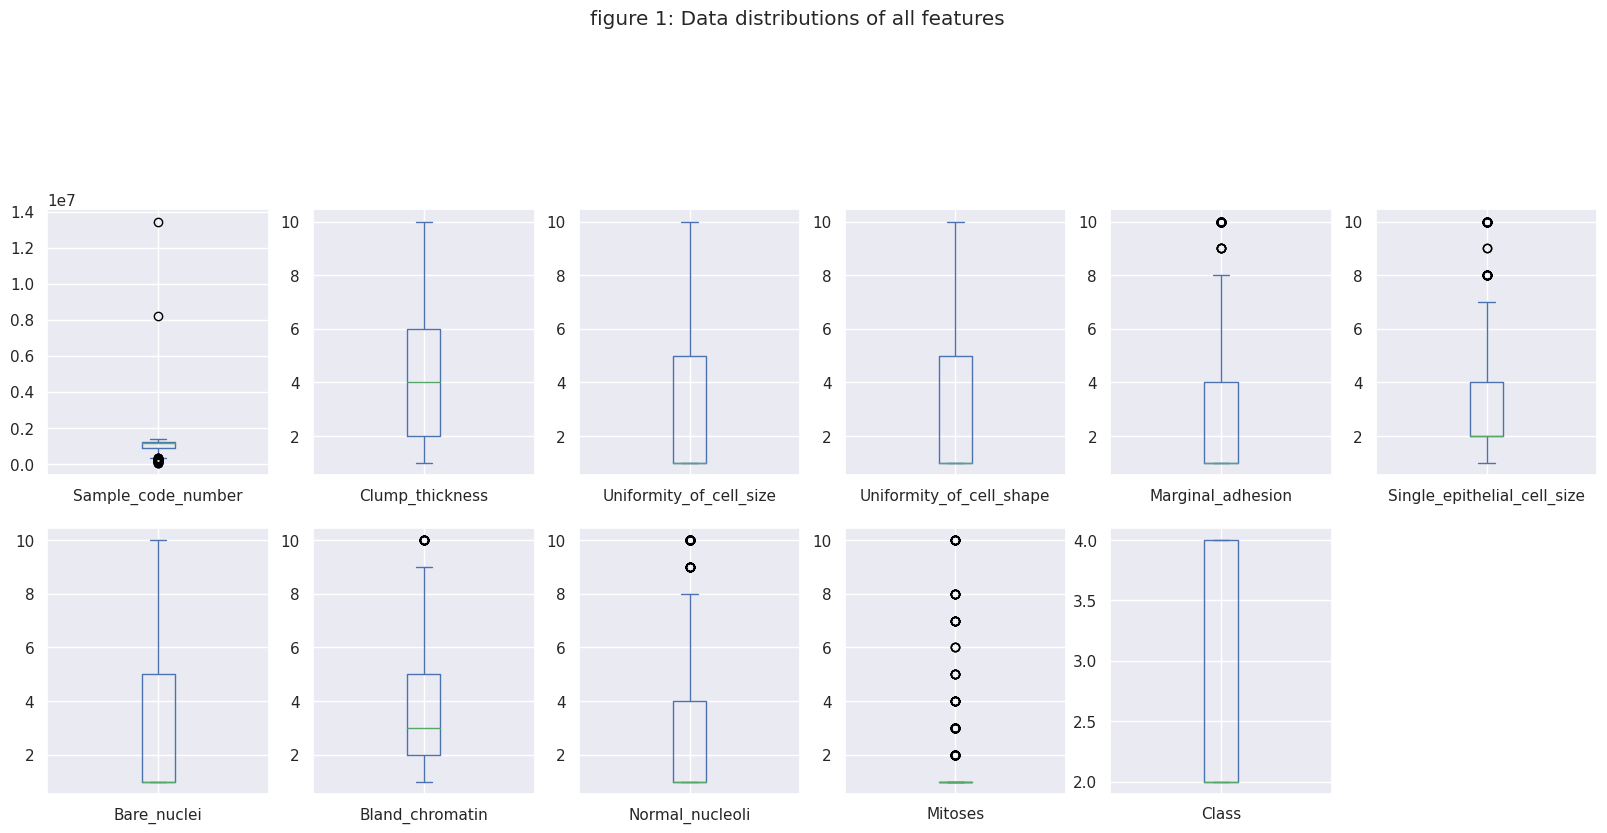

In [ ]:
# menampilkan boxplot untuk melihat adanya Outlayer
dataClean.plot(kind='box',subplots=True,layout=(5,6), sharex=False,figsize = (20,20),
                           title='figure 1: Data distributions of all features')
plt.show()

In [ ]:
# menampilkan deskripsi data yang sudah dibersihkan
dataClean.describe()

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
count,6.900000e+02,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,1.073826e+06,4.428986,3.133333,3.204348,2.827536,3.213043,3.482609,3.436232,2.885507,1.594203,2.689855
std,6.196092e+05,2.817378,3.042451,2.960844,2.867787,2.200964,3.617064,2.444060,3.067682,1.724230,0.951379
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.744845e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171752e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238450e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [ ]:
dataClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample_code_number           690 non-null    int64  
 1   Clump_thickness              690 non-null    int64  
 2   Uniformity_of_cell_size      690 non-null    int64  
 3   Uniformity_of_cell_shape     690 non-null    int64  
 4   Marginal_adhesion            690 non-null    int64  
 5   Single_epithelial_cell_size  690 non-null    int64  
 6   Bare_nuclei                  690 non-null    float64
 7   Bland_chromatin              690 non-null    int64  
 8   Normal_nucleoli              690 non-null    int64  
 9   Mitoses                      690 non-null    int64  
 10  Class                        690 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 64.7 KB


In [ ]:
dataClean

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


###Essay 3
Deskripsikan Temuan Anda disini

*   Tipe data sudah disesuaikan
*   Missing value dan data duplikat sudah diperbaiki/dibersihkan
*   Status pasien kanker payudara dengan status benign ada 452 pasien, sedangkan status malignant ada 238 pasien





## 7) Menentukan Label Data <a class="anchor" id="h7"></a>

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_norm= dataClean.drop("Class",axis=1).values
y = dataClean.iloc[:,-1]

In [ ]:
# perbandingan data training dan data testing adalah 70 : 30
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=42)

## 8) Membangun Model <a class="anchor" id="h8"></a>

In [ ]:
# import library pemodelan yang digunakan
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [ ]:
# Naive Bayes
clean_classifier_nb = GaussianNB()
clean_classifier_nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Decision Tree
clean_classifier_dt = DecisionTreeClassifier(random_state=42)
clean_classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Random Forest
clean_classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clean_classifier_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 9) Mengevaluasi Hasil Pemodelan <a class="anchor" id="h9"></a>

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,precision_score

In [ ]:
def evaluation(Y_test,Y_pred):
    acc = accuracy_score(Y_test,Y_pred)
    rcl = recall_score(Y_test,Y_pred,average = 'weighted')
    f1 = f1_score(Y_test,Y_pred,average = 'weighted')
    ps = precision_score(Y_test,Y_pred,average = 'weighted')

    metric_dict={'accuracy': round(acc,3),
               'recall': round(rcl,3),
               'F1 score': round(f1,3),
               'Precision score': round(ps,3)
              }

    return print(metric_dict)

In [ ]:
y_pred_nb = clean_classifier_nb.predict(X_test)

# Evaluate the Naive Bayes model
print("\nNaive Bayes Model:")
accuracy_nb = round(accuracy_score(y_test, y_pred_nb),3)
print("Accuracy:",accuracy_nb)
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Model:
Accuracy: 0.855
Classification Report:
              precision    recall  f1-score   support

           2       0.90      0.90      0.90       144
           4       0.76      0.76      0.76        63

    accuracy                           0.86       207
   macro avg       0.83      0.83      0.83       207
weighted avg       0.86      0.86      0.86       207



In [ ]:
evaluation(y_test,y_pred_nb)

{'accuracy': 0.855, 'recall': 0.855, 'F1 score': 0.855, 'Precision score': 0.855}


In [ ]:
y_pred_dt = clean_classifier_dt.predict(X_test)

# Evaluate the Decission Tree model
print("\nDecission Tree Model:")
accuracy_dt = round(accuracy_score(y_test, y_pred_dt),3)
print("Accuracy:",accuracy_dt)
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decission Tree Model:
Accuracy: 0.952
Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.96      0.97       144
           4       0.91      0.94      0.92        63

    accuracy                           0.95       207
   macro avg       0.94      0.95      0.94       207
weighted avg       0.95      0.95      0.95       207



In [ ]:
evaluation(y_test,y_pred_dt)

{'accuracy': 0.952, 'recall': 0.952, 'F1 score': 0.952, 'Precision score': 0.952}


In [ ]:
y_pred_rf = clean_classifier_rf.predict(X_test)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf = round(accuracy_score(y_test, y_pred_rf),3)
print("Accuracy:",accuracy_rf)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model:
Accuracy: 0.966
Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.98      0.98       144
           4       0.95      0.94      0.94        63

    accuracy                           0.97       207
   macro avg       0.96      0.96      0.96       207
weighted avg       0.97      0.97      0.97       207



In [ ]:
evaluation(y_test,y_pred_rf)

{'accuracy': 0.966, 'recall': 0.966, 'F1 score': 0.966, 'Precision score': 0.966}


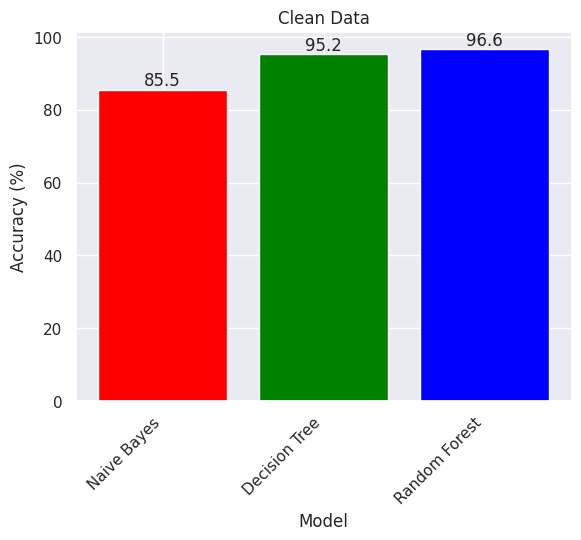

In [ ]:
model_comp = pd.DataFrame({'Model': ['Naive Bayes','Decision Tree','Random Forest'], 'Accuracy': [accuracy_nb*100,
                    accuracy_dt*100,accuracy_rf*100]})

# membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp['Model'], model_comp['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Clean Data')
plt.xticks(rotation=45, ha='right')  # Untuk memutar label sumbu x agar lebih mudah dibaca

# menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

###Essay 4
Deskripsikan Temuan Anda disini

*   Klasifikasi dengan algoritma Naive Bayes menghasilkan akurasi 85.5%
*   Klasifikasi dengan algoritma Decision Tree menghasilkan akurasi 95.2%
*   Klasifikasi dengan algoritma Random Forest menghasilkan akurasi 96.6%


## 10) Optimasi Model Klasifikasi <a class="anchor" id="h10"></a>

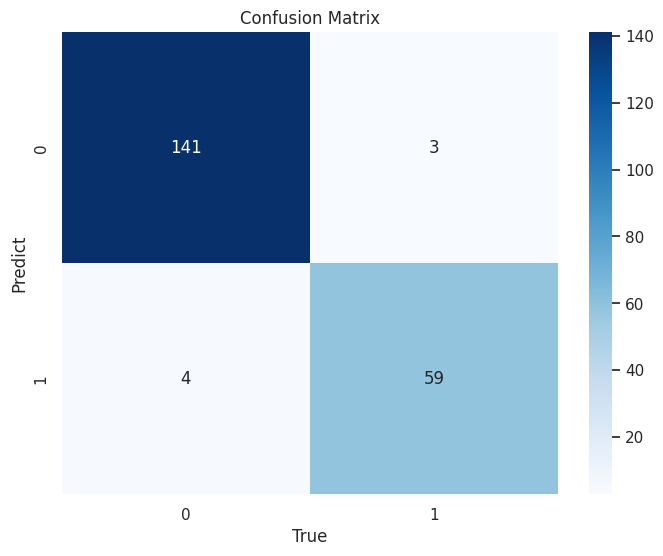

In [ ]:
# nilai confusion matrix untuk model dengan akurasi tertinggi (random forest)

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

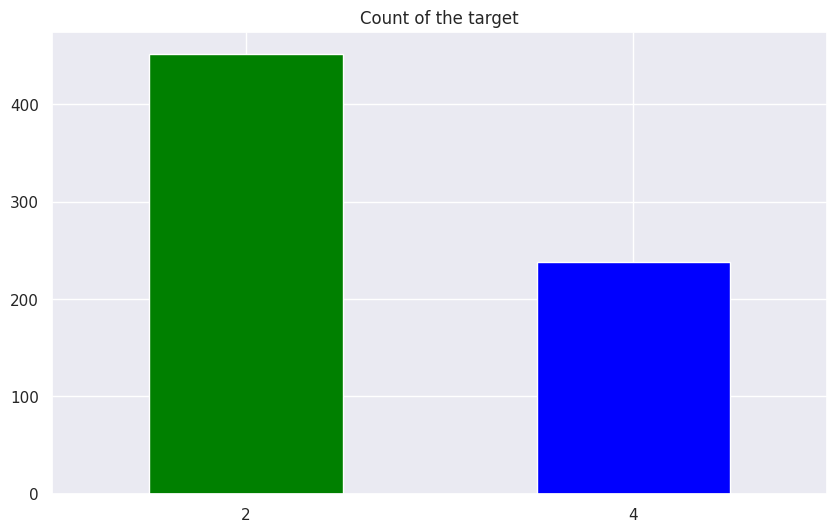

In [ ]:
# melakukan pengecekan terhadap persebaran jumlah target
dataClean['Class'].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("Count of the target")
plt.xticks(rotation=0);

Pada grafik diatas menunjukkan bahwa kelas value 2 memiliki jumlah lebih banyak daripada kelas value 4. Hal itu menimbulkan ketidakseimbangan data, maka akan dilakukan oversampling yaitu metode menyeimbangkan data jika jumlah dataset sedikit. Metode oversampling yang akan digunakan yaitu SMOTE

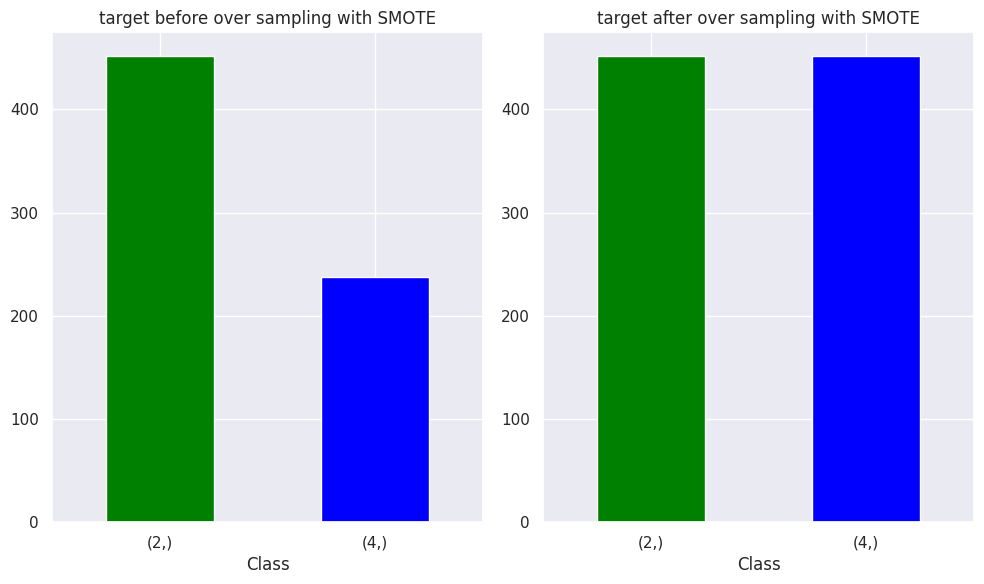

In [ ]:
from imblearn.over_sampling import SMOTE

# proses oversampling
smote = SMOTE(random_state=42, k_neighbors=4)               #k_neighbors <= k_samples
X_smote_resampled, y_smote_resampled = smote.fit_resample(X_norm, y)

# menampilkan grafik sebelum target diseimbangkan dan setelah diseimbangkan menggunakan oversampling
plt.figure(figsize=(12, 4))
new_df1 = pd.DataFrame(data=y)
plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar', figsize=(10,6), color=['green','blue','red','yellow'])
plt.title('target before over sampling with SMOTE')
plt.xticks(rotation=0);

plt.subplot(1, 2, 2)
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts().plot(kind='bar', figsize=(10,6), color=['green','blue','red','yellow'])
plt.title('target after over sampling with SMOTE')
plt.xticks(rotation=0);
plt.tight_layout()
plt.show()

In [ ]:
# cek jumlah target sebelum dilakukan oversampling
new_df1 = pd.DataFrame(data=y)
new_df1.value_counts()

Class
2        452
4        238
dtype: int64

In [ ]:
# cek jumlah target setelah dilakukan oversampling
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts()

Class
2        452
4        452
dtype: int64

In [ ]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.3, random_state=42)

In [ ]:
selected_classifier_rf = RandomForestClassifier()
selected_classifier_rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [ ]:
y_pred_rf_selected = selected_classifier_rf.predict(X_test_resampled)

# Evaluate the optimize model
print("\nRandom Forest Model:")
accuracy_rf_selected = round(accuracy_score(y_test_resampled, y_pred_rf_selected),3)
print("Accuracy:",accuracy_rf_selected)
print("Classification Report:")
print(classification_report(y_test_resampled, y_pred_rf_selected))


Random Forest Model:
Accuracy: 0.978
Classification Report:
              precision    recall  f1-score   support

           2       0.98      0.98      0.98       143
           4       0.98      0.98      0.98       129

    accuracy                           0.98       272
   macro avg       0.98      0.98      0.98       272
weighted avg       0.98      0.98      0.98       272



In [ ]:
evaluation(y_test_resampled,y_pred_rf_selected)

{'accuracy': 0.978, 'recall': 0.978, 'F1 score': 0.978, 'Precision score': 0.978}


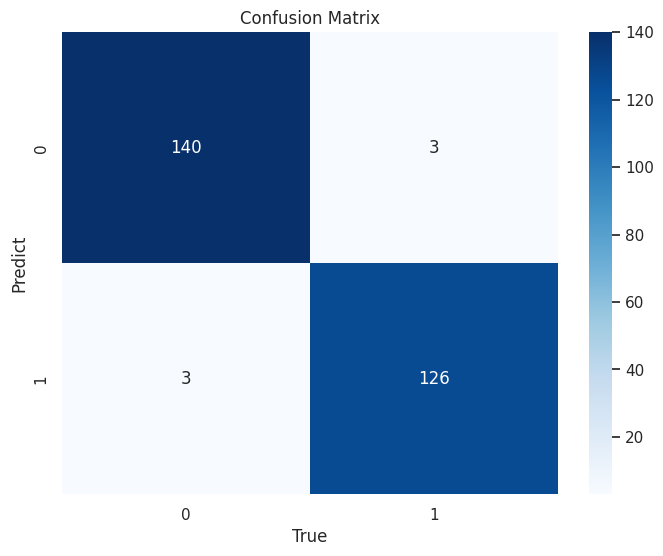

In [ ]:
cm = confusion_matrix(y_test_resampled, y_pred_rf_selected)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

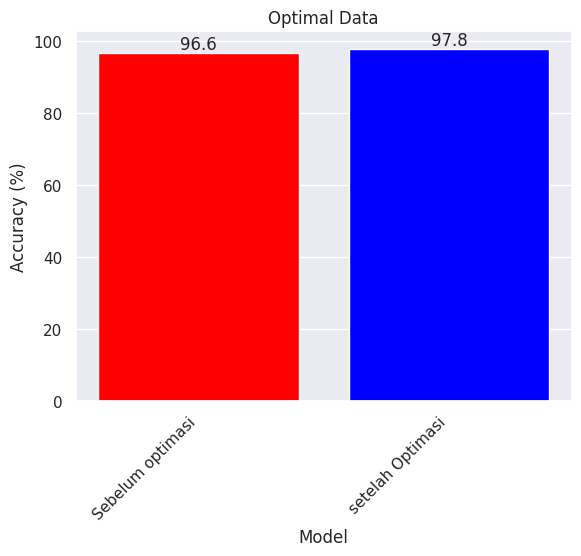

In [ ]:
model_comp = pd.DataFrame({'Model': ['Sebelum optimasi','setelah Optimasi'], 'Accuracy': [accuracy_rf*100,
                    accuracy_rf_selected*100]})

# membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp['Model'], model_comp['Accuracy'], color=['red', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Optimal Data')
plt.xticks(rotation=45, ha='right')  # Untuk memutar label sumbu x agar lebih mudah dibaca

# menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

###Essay 5
Deskripsikan Temuan Anda disini

Setelah dilakukan optimasi model pada algoritma Random Forest dengan menggunakan metode oversampling SMOTE, didapatkan hasil peningkatan akurasi dari 96.6% menjadi 97.8%. Hal ini membuktikan bahwa model yang dibuat sudah cukup baik karena hasil akurasi hampir mencapai 100%